# UT3 - Práctica 1

## Ejercicio 1

Antes de empezar a trabajar de verdad, tendrás que importar las librerías de NumPy y Matplotlib.Pyplot para poder trabajar con ellas:

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Ejercicio 2

Haz una nueva versión de la función definida en la Práctica 1 para la transformación de imágenes de color a blanco y negro. En esta nueva versión, la función debe aceptar como primer parámetro la imagen a transformar. Después, debe aceptar tres parámetros (r,g,b) con los pesos utilizados en la transformación. Estos parámetros tendrán unos valores definidos por defecto por lo que serán opcionales:

*   r: 0.2989
*   g: 0.587
*   b: 0.114

In [118]:
def colorToGrayscale2(img, r=0.2989, g=0.587, b=0.114):
    grayimg = img.copy()
    grayimg = (r*grayimg[:,:,0] + g*grayimg[:,:,1] + b*grayimg[:,:,2])/255 # Función para pasar rgb a grayscale
    return grayimg

---
## Ejercicio 3

Utilizando la función definida en el ejercicio anterior, haz **al menos** las siguientes pruebas con una misma imagen y muestra todos los resultados:

*   Sin parámetros (que r, g y b tomen los valores por defecto)
*   r = 0.2126,  g = 0.7152,  b = 0.0722
*   r = 1/3,  g = 1/3,  b = 1/3

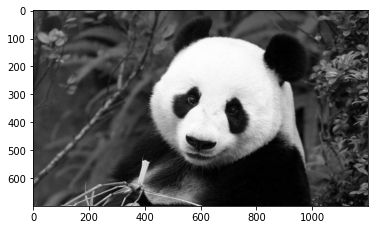

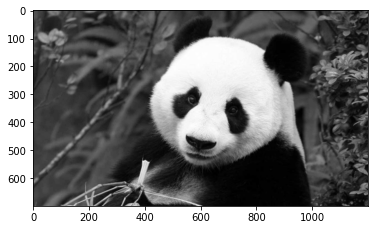

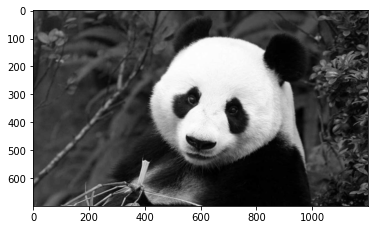

In [119]:
img3 = plt.imread("01_panda1.jpg")

plt.imshow(colorToGrayscale2(img3), cmap="gray")
plt.show()
plt.imshow(colorToGrayscale2(img3, 0.2126, 0.7152, 0.0722), cmap="gray")
plt.show()
plt.imshow(colorToGrayscale2(img3, 1/3, 1/3, 1/3), cmap="gray")
plt.show()

# # Para ver los cambios
# imageeee_1 = colorToGrayscale2(img3, 0.2126, 0.7152, 0.0722)
# imageeee_2 = colorToGrayscale2(img3)
# plt.imshow(imageeee_1 - imageeee_2, cmap="gray")
# plt.show()

---
## Ejercicio 4

Importa la imagen "lenna_gris.png" y haz una copia de la misma (np.copy()). Calcula y muestra su imagen negativa:

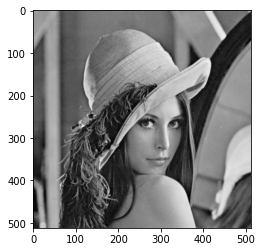

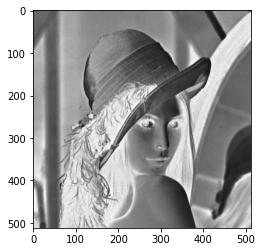

In [120]:
img4 = plt.imread("01_lenna_gris.png")
img4n = img4.copy()

img4n = 1-img4n

plt.imshow(img4, cmap="gray")
plt.show()
plt.imshow(img4n, cmap="gray")
plt.show()

---
## Ejercicio 5

Importa una imagen a color y calcula su negativa en una copia. Muestra ambas por pantalla:

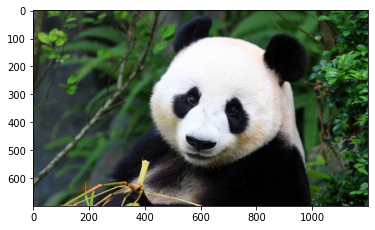

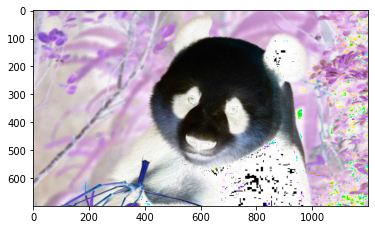

In [121]:
img5 = plt.imread("01_panda1.jpg")
img5n = img5.copy()

img5n = 1-img5n

plt.imshow(img5)
plt.show()
plt.imshow(img5n)
plt.show()

---
## Ejercicio 6

Utilizando una imagen en escala de grises como base, calcula su imagen logaritmica de las siguientes dos formas y muestra todas por pantalla:

*   nueva_intensidad = log(1 + vieja_intensidad)
*   nueva_intensidad = log(vieja_intensidad)

Compara los resultados, ¿Como afecta? Haz las pruebas que quieras modificando el input del logaritmo:

C:\Users\BDIA\AppData\Local\Temp/ipykernel_12124/3382344004.py:6: RuntimeWarning: divide by zero encountered in log
  img6l2 = np.log(img6)


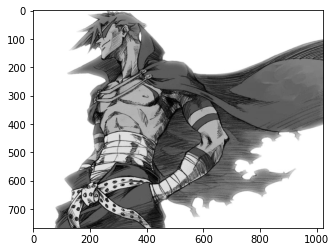

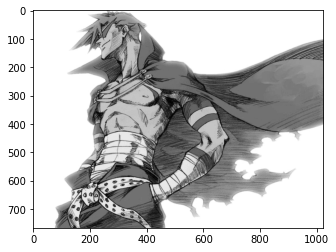

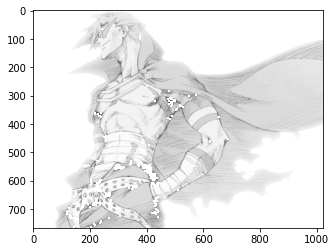

In [122]:
# img6 = colorToGrayscale2(plt.imread("01_panda1.jpg"))
# img6 = colorToGrayscale2(plt.imread("01_panda2.jpg"))
img6 = colorToGrayscale2(plt.imread("01_kamina.jpg"))

img6l1 = np.log(1 + img6)
img6l2 = np.log(img6)

plt.imshow(img6, cmap="gray")
plt.show()
plt.imshow(img6l1, cmap="gray")
plt.show()
plt.imshow(img6l2, cmap="gray")
plt.show()

---
## Ejercicio 7

Crea una función que reciba por parámetro una imagen en blanco y negro y un porcentaje de "ruido". La función deberá añadir "ruido" a la imágen en base al factor recibido por parámetro. Este parámetro añadirá como "ruido" un valor de 0 o 1 (elegido entre estos dos de forma aleatoria) en un X porciento de la imagen, siendo X el valor recibido por parámetro (no hace falta que sea exacto, solo aproximado). La función devolverá la imagen con el ruido añadido:

In [123]:
def ruido(img, x):
    ruidoimg = img.copy()
    f = 0
    for fila in ruidoimg:
        c = 0
        for columna in fila:
            if (np.random.random() < x/100):
                valor = np.random.randint(0,2)
                ruidoimg[f, c] = valor
            c =c+1
        f = f+1
    return ruidoimg

---
## Ejercicio 8

Importa al menos 3 imágenes a color de distintos tamaños, y conviértelas a escala de grises con la función del ejercicio 2, almacenando los resultados en nuevas variables. Añade a cada una de las tres ruido con el factor 0.5, 1 o 5 respectivamente utilizando la función del ejercicio 7 y muéstralas por pantalla:

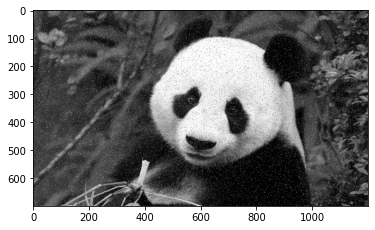

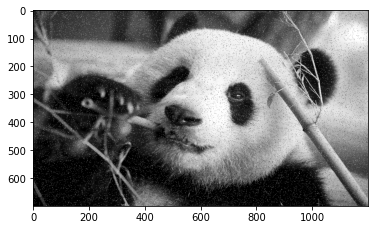

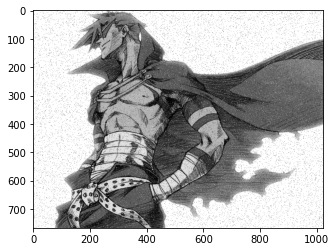

In [124]:
x = 5

img8a = ruido(colorToGrayscale2(plt.imread("01_panda1.jpg")), x)
img8b = ruido(colorToGrayscale2(plt.imread("01_panda2.jpg")), x)
img8c = ruido(colorToGrayscale2(plt.imread("01_kamina.jpg")), x)

plt.imshow(img8a, cmap="gray")
plt.show()
plt.imshow(img8b, cmap="gray")
plt.show()
plt.imshow(img8c, cmap="gray")
plt.show()

---
## Ejercicio 9

Define una función que reciba como parámetros una imagen y un tamaño de máscara. Si no se recibe tamaño de máscara su valor por defecto será 3. Además, deberá comprobar que la máscara pasada como parámetro tenga un tamaño impar, de no ser así, la función devolverá un valor nulo.

El objetivo de esta función es que partiendo de una copia de la imagen recibida como parámetro, la recorrerá calculando la media de la intensidad de los píxeles dentro de la máscara y asignando esa media como valor del propio píxel. Por último, devolverá la imagen modificada:

In [149]:
def mask(img, size=3):
    if (size%2 == 0): return None
    maskimg = img
    f = 0
    for fila in maskimg:
        c = 0
        for columna in fila:
            if (f > size/2 and f < img.shape[0]-size/2 and c > size/2 and c < img.shape[1]-size/2):
                maskimg[f, c] = s(maskimg, f, c, size)
            c =c+1
        f = f+1
    return maskimg

def s(img, f, c, size):
    a = int(size/2)
    ret = 0
    for x in range(-a, a, 1):
        for y in range(-a, a, 1):
            ret += img[f+x, c+y]
    return ret/(size*size)

---
## Ejercicio 10

Utilizando las 3 imagenes con ruido del ejercicio 8, pon a prueba la función definida en el ejercicio 9. Muestra los resultados por pantalla:

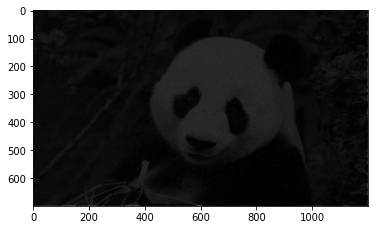

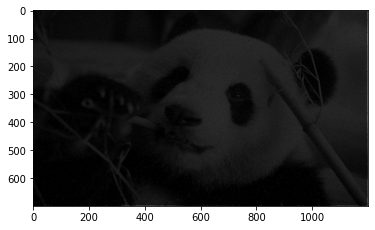

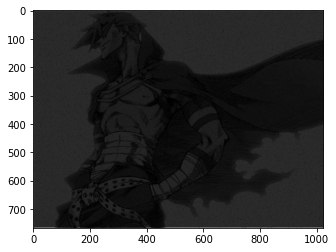

In [150]:
img10a = mask(img8a.copy())
img10b = mask(img8b.copy())
img10c = mask(img8c.copy())

plt.imshow(img10a, cmap="gray")
plt.show()
plt.imshow(img10b, cmap="gray")
plt.show()
plt.imshow(img10c, cmap="gray")
plt.show()

---
## Ejercicio 11

Haz una copia de la función definida en el ejercicio 9 y modificala de tal forma que únicamente aplique la media a aquellos píxeles que tengan el valor 0 o 1.

In [127]:
def mask2(img, size=3):
    if (size%2 == 0): return None
    maskimg = img
    f = 0
    for fila in maskimg:
        c = 0
        for columna in fila:
            if (maskimg[f, c] == 0 or maskimg[f, c] == 1):
                maskimg[f, c] = s(maskimg, f, c, size)
            c =c+1
        f = f+1
    return maskimg

def s(img, f, c, size):
    a = int(size/2)
    ret = 0
    for x in range(-a, a, 1):
        for y in range(-a, a, 1):
            ret += img[f+x, c+y]
    return ret/(size*size)

---
## Ejercicio 12

Haz lo mismo que en el ejercicio 10 solo que utilizando la función definida en el ejercicio 11:

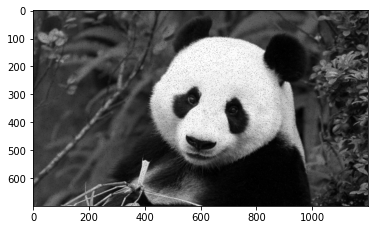

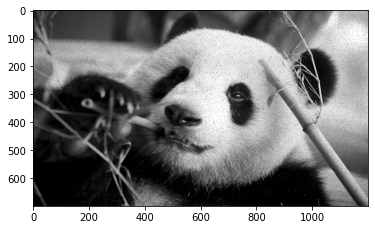

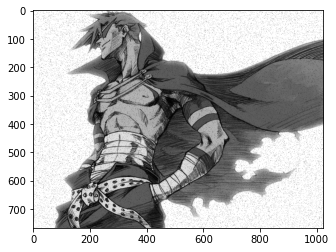

In [128]:
img12a = mask2(img8a.copy())
img12b = mask2(img8b.copy())
img12c = mask2(img8c.copy())

plt.imshow(img12a, cmap="gray")
plt.show()
plt.imshow(img12b, cmap="gray")
plt.show()
plt.imshow(img12c, cmap="gray")
plt.show()